![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Segmentación de clientes credito vehiculo**

**Marketing Analytics** <br>

Profesor: Hugo Alexander Martinez <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

Daniel Mauricio Cardenas<br>


# Metodologia de mineria de Datos - CRISP DM

## Comprensión del negocio.

- **Contexto**

Según Segura, F. E. P., y Ayala, J. C. P. (2005), el crédito para vehículos en Colombia se originó en la década de 1970, impulsado principalmente por la creación de ensambladoras que generaron empleo en sectores populares. Este desarrollo contribuyó al crecimiento económico y a la creciente necesidad de adquirir vehículos. Las entidades financieras vieron en esta situación una oportunidad de negocio debido a la alta demanda, ofreciendo créditos caracterizados por su alto valor, tasas de interés elevadas y garantías respaldadas por el mismo activo, además de contar con uno o varios codeudores. Con el tiempo, los bancos comenzaron a crear líneas de crédito especializadas para este sector.

Para 2024, la oferta de créditos para la adquisición de vehículos en Colombia es bastante amplia, y las tasas de interés varían según el tipo de vehículo, ya sea nuevo o usado, así como si es híbrido, eléctrico o de combustión fósil.

![Tasas de interes vehiculos](https://img.lalr.co/cms/2024/04/08165245/web_900_finanzas_autos_p21.jpg) <br>
[Fuente](https://www.larepublica.co/finanzas/estas-son-las-tasas-de-interes-que-ofrecen-las-entidades-para-los-creditos-de-vehiculos-3836450)

La financiación puede alcanzar hasta el 100% del valor del vehículo, con un plazo máximo de hasta 7 años (84 meses). Actualmente, Bancolombia ofrece la tasa más baja del mercado para la adquisición de vehículos eléctricos, con un 14.71% E.A., seguida de Davivienda con un 15.12% E.A. En términos generales, las tasas en el mercado rondan un promedio del 17% E.A

De acuerdo con el DANE, en el primer trimestre de 

- **Objetivos del negocio**





## Analisis Exploratorio de los datos.

A continuación se realiza el analisis exploratorio de los datos, de acuerdo con el cuestionario **Crédito Vehículo - Potenciales**

In [1]:
from utils import *

In [2]:
#Cargar el dataset
url = "https://github.com/LordOnion88/MAD/raw/refs/heads/main/Marketing%20Analytics/Clustering/MAVEHICULO%20POTENCIALF.xlsx"

data = pd.read_excel(url, sheet_name='TEXTOS')
data.head(5)


,REGISTRO,CIUDAD,F1,F2,F6,F7,P1_1,P1_2,P1_3,P2,...,P64_2,P64A_OTRO,P64B_OTRO,P64C_OTRO,P64D_OTRO,P64E_OTRO,P64F_OTRO,D1,D2,D3
0,71,Bogotá,Si,Si,Mayor 60 años,Estrato Medio (3),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Masculino,Independiente,Primaria completa
1,68,Bogotá,No,Si,25a 39 años,Estrato Medio (3),Mayor confort para transportarse / transportar...,NaN,NaN,Con financiamiento,...,NaN,-,-,-,-,-,-,Femenino,Empleado tiempo completo,Universidad incompleta
2,75,Bogotá,Si,Si,25a 39 años,Estrato Medio Típico (4),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Femenino,Empleado tiempo completo,Universidad completa
3,77,Bogotá,No,Si,25a 39 años,Estrato Medio (3),Por superación personal,NaN,NaN,Con recursos propios,...,NaN,-,-,-,-,-,-,Masculino,Empleado tiempo completo,Técnico / tecnólogo
4,76,Bogotá,Si,Si,40 a 60 años,Estrato Medio (3),-,NaN,NaN,-,...,NaN,-,-,-,-,-,-,Masculino,Empleado tiempo completo,Postgrado


In [3]:
columnasAED = ['CIUDAD', 'F6','F7','D1','D2','D3']

data_AED = data.copy()
data_AED = data_AED[columnasAED]
data_AED

,CIUDAD,F6,F7,D1,D2,D3
0,Bogotá,Mayor 60 años,Estrato Medio (3),Masculino,Independiente,Primaria completa
1,Bogotá,25a 39 años,Estrato Medio (3),Femenino,Empleado tiempo completo,Universidad incompleta
2,Bogotá,25a 39 años,Estrato Medio Típico (4),Femenino,Empleado tiempo completo,Universidad completa
3,Bogotá,25a 39 años,Estrato Medio (3),Masculino,Empleado tiempo completo,Técnico / tecnólogo
4,Bogotá,40 a 60 años,Estrato Medio (3),Masculino,Empleado tiempo completo,Postgrado
...,...,...,...,...,...,...
120,Medellín,25a 39 años,Estrato Medio (3),Masculino,Independiente,Técnico / tecnólogo
121,Pasto,25a 39 años,Estrato Medio Típico (4),Masculino,Empleado tiempo completo,Universidad completa
122,Pasto,25a 39 años,Estrato Medio (3),Masculino,Independiente,Bachillerato completo
123,Pasto,40 a 60 años,Estrato Medio (3),Masculino,Independiente,Técnico / tecnólogo


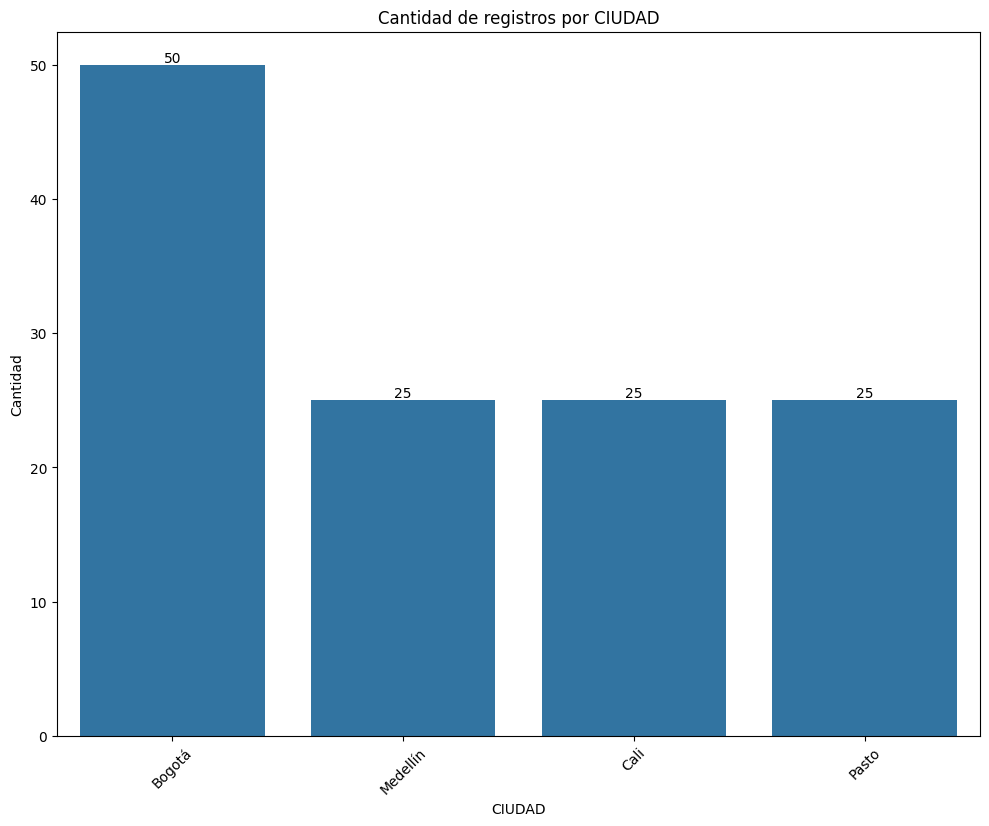

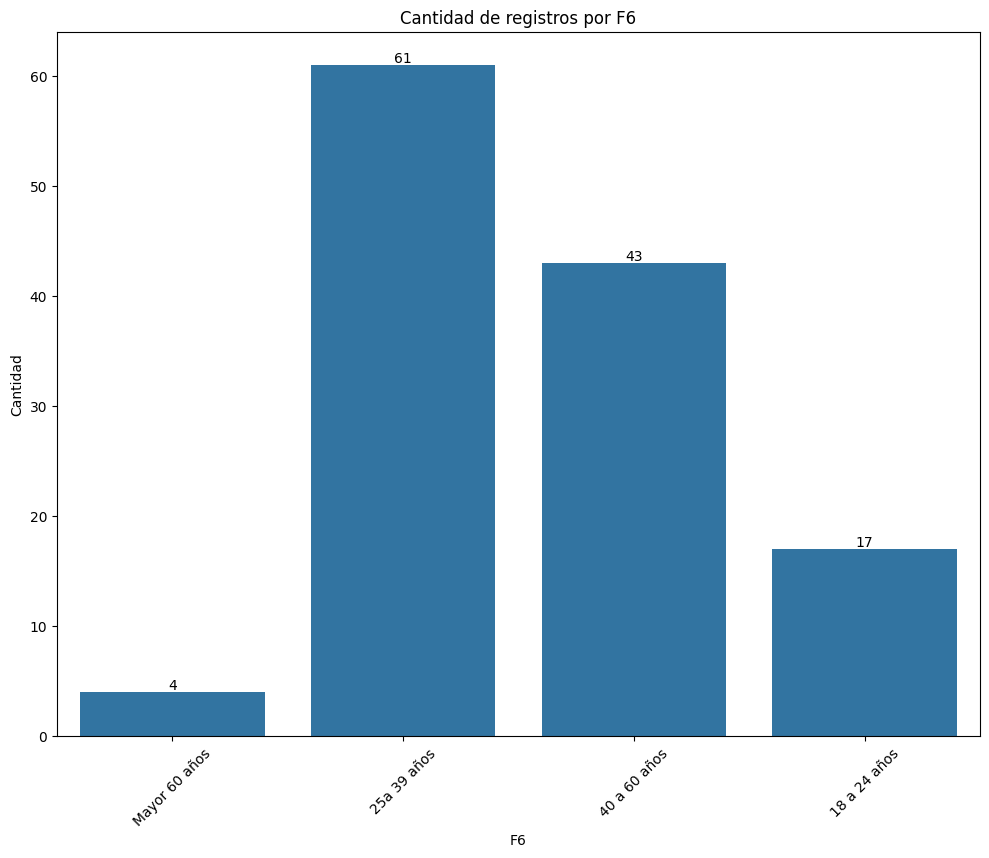

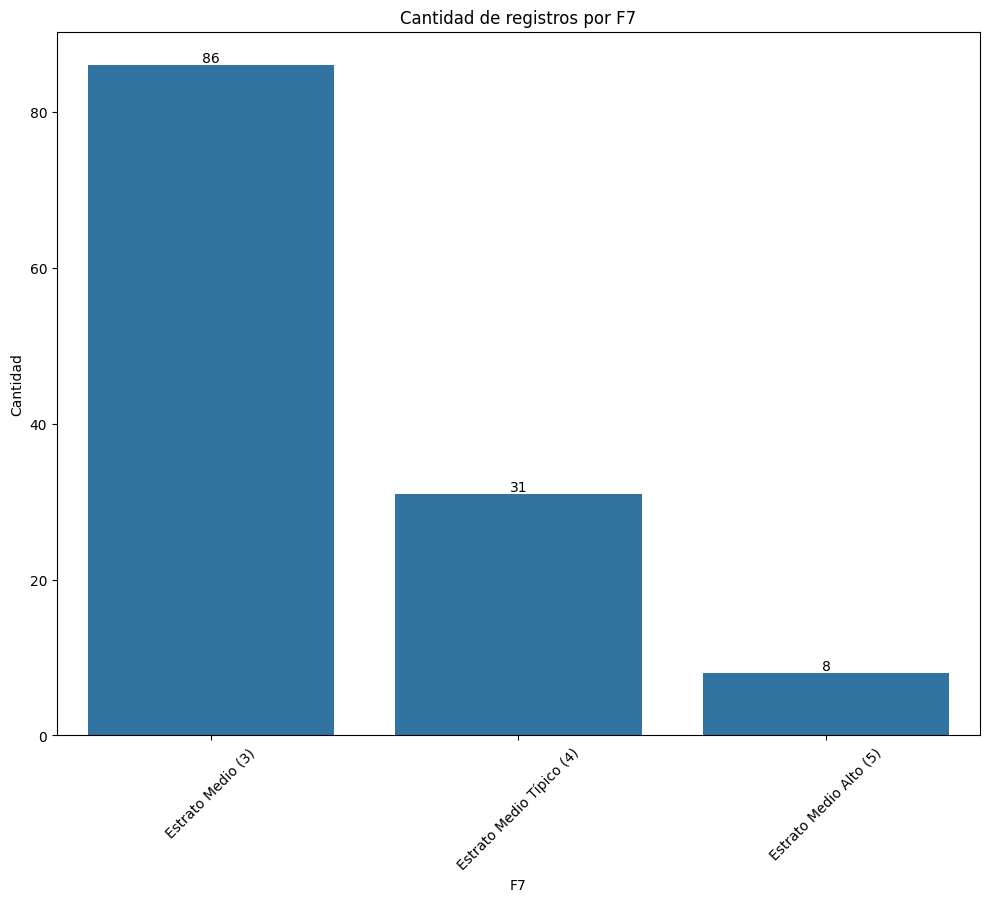

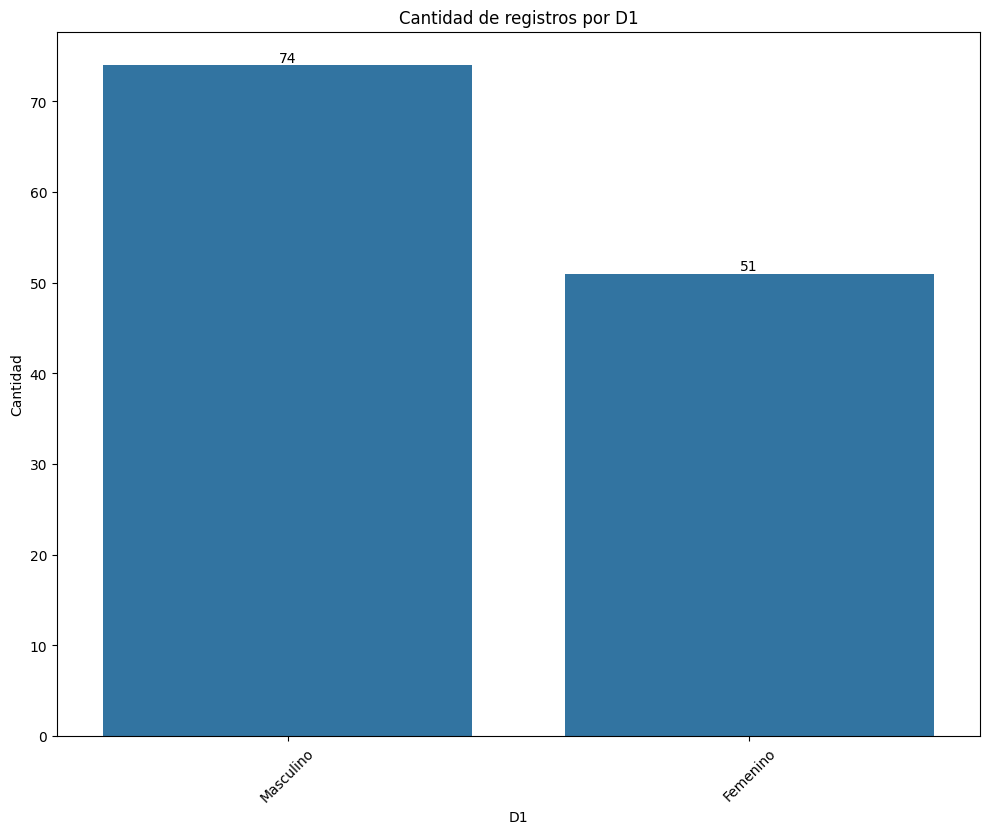

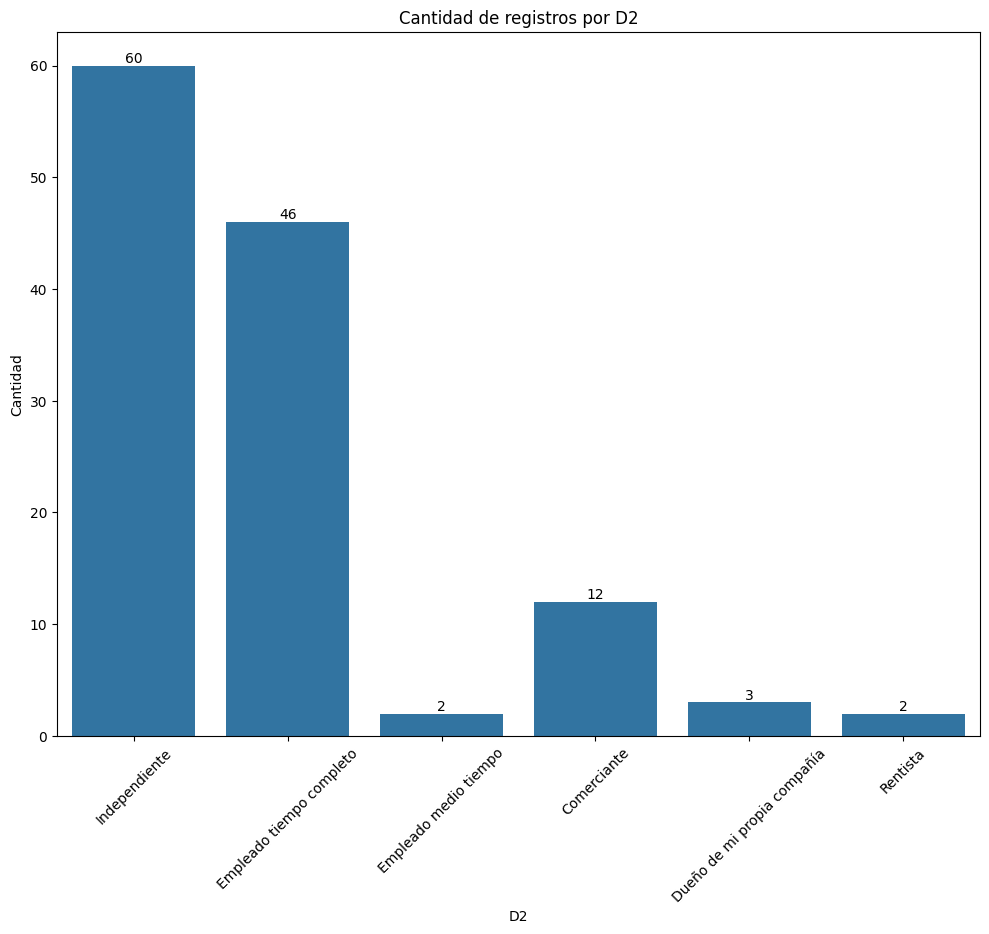

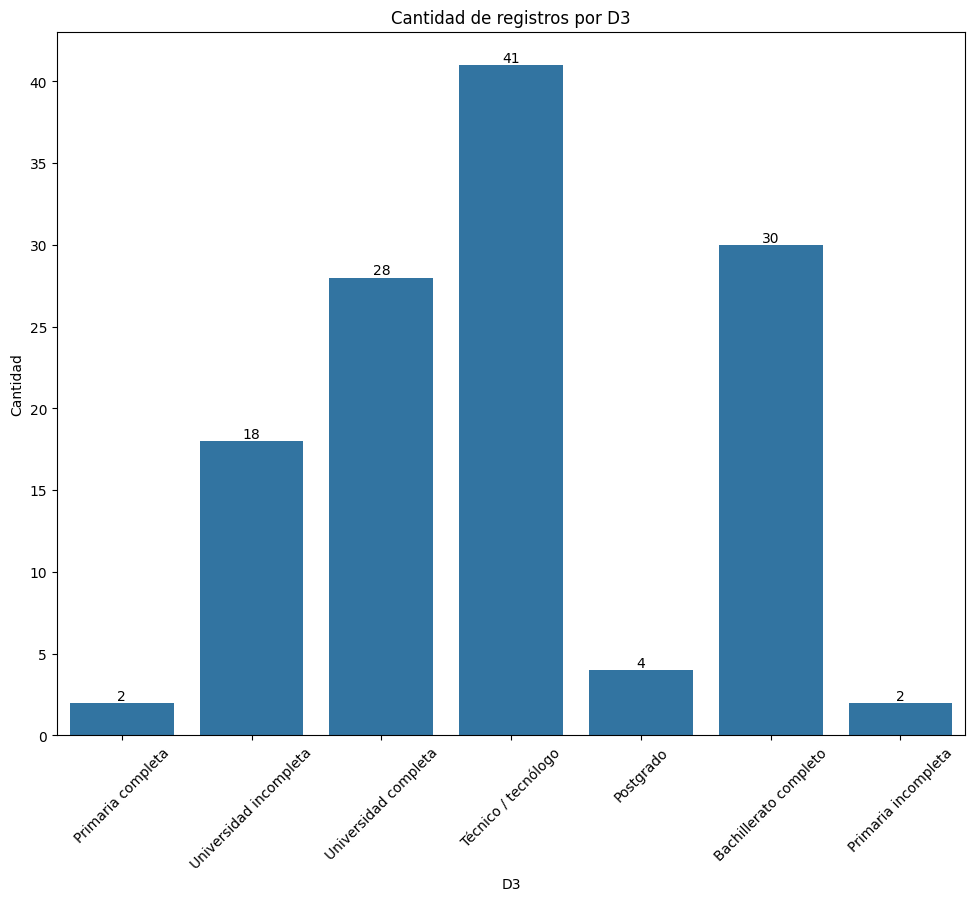

SyntaxError: 'return' outside function (1073106635.py, line 3)

In [4]:
for x in data_AED.columns:
    Graficar_categoricas (x,data_AED)
return

## Referencias

`SEGURA, F. E. P., & AYALA, J. C. P. ORIGINACION DE CREDITOS DE VEHICULOS PARTICULARES EN COLOMBIA-NEGOCIO PARA REDISEÑAR.`